### Create figures from saved csv files

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/home/filip-marcus/.local/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/filip-marcus/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


### Read csv-files

In [2]:
data = pd.read_csv('/home/filip-marcus/results/eneryield/pretrain_10_04_2025.csv')
data

,train_loss,event_label_preds,event_label_labels
0,211.595245,NaN,NaN
1,335.489471,NaN,NaN
2,124.505295,NaN,NaN
3,135.947525,NaN,NaN
4,87.839500,NaN,NaN
...,...,...,...
340,29.024265,NaN,NaN
341,30.095898,NaN,NaN
342,30.508511,NaN,NaN
343,32.547989,NaN,NaN


### Settings

In [9]:
cmap = plt.get_cmap('mako')

### Event label confusion matrix

### Forgetting curve

### Total learning curve

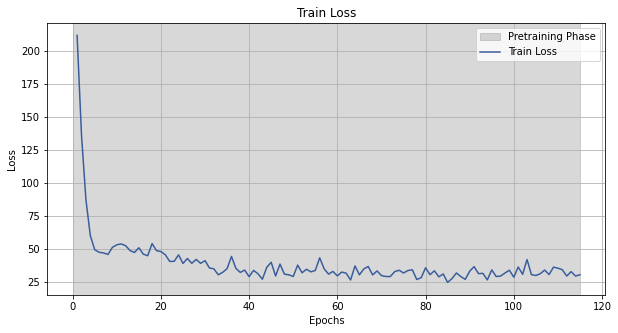

In [ ]:
train_loss = np.array(data['train_loss'])
num_epochs = 115
steps_per_epoch = len(train_loss) / num_epochs
train_loss = train_loss[::int(steps_per_epoch)]
epochs = np.arange(1, num_epochs + 1)

line_color = cmap(0.4)

plt.figure(figsize=(10, 5))

# Shade the pretraining region
plt.axvspan(0, num_epochs, color='gray', alpha=0.3, label='Pretraining Phase')

plt.plot(epochs, train_loss, label='Train Loss', color=line_color)
plt.title('Train Loss')
plt.xlabel('Epochs')    
plt.ylabel('Loss')
plt.legend()
plt.grid(True)